解偏微分方程由于缺少特定的工具包，更多的情况下需要自己写代码求解。这就迫使我们不得不理解微分方程求解的核心思想：以离散代替连续，用差分逼近微分。 一类有限差分法求解偏微分方程数值解的步骤包括如下几步：

    定义初始条件函数 U(x,0)U(x,0)；
    输入模型参数，对于待求解函数F(x,t)F(x,t)定义求解的时间域(tStart,tEnd)(tStart,tEnd)和空间域(xMin,xMax)(xMin,xMax)，设置差分步长dtdt, nNodesnNodes；
    初始化解空间；
    根据递推规则递推求解差分方程在区间[xa, xb]的数值解，获得网格节点的处的函数值，最终填满整个解空间。

差分方程：x的变化不是无穷小的，是有间隔的。差分的定义为y下标x+1-y下标x的差值

差分方程用递推法求解，https://www.bilibili.com/video/BV1HT4y1w7Su/?spm_id_from=333.337.search-card.all.click&vd_source=aef945ddeb8da892af523bcc2d697778

对于差分方程的求解同微分方程一样有公式可用

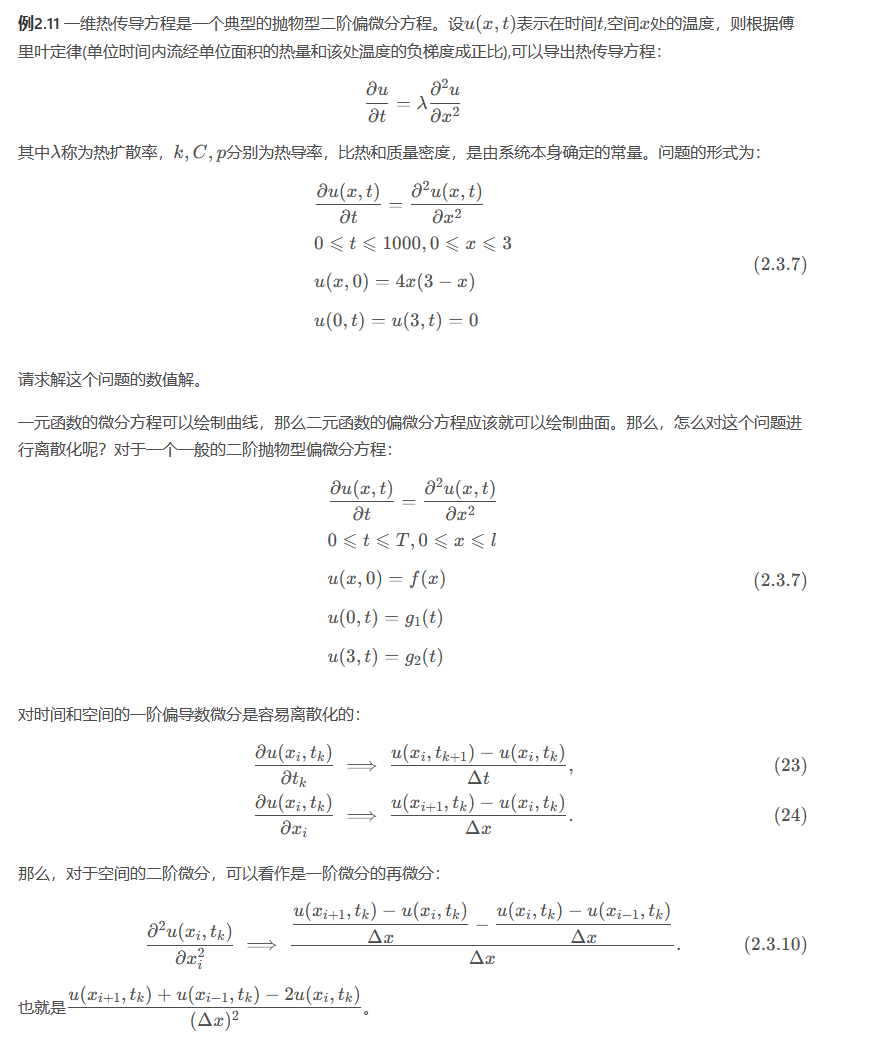

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-31 110751.png")

将得到的带回原式子，可以得到U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1#空间步长
N =30#空间步数
dt = 0.0001#时间步长
M = 10000#时间的步数
A = dt/(h**2) #lambda*tau/h^2
U = np.zeros([N+1,M+1])#建立二维空数组 空间为行，时间为列
Space = np.arange(0,(N+1)*h,h)#建立空间等差数列，从0到3，公差是h
#边界条件
'''在所有时间步数上设置空间边界条件，即在空间的两个边界处温度始终为 0'''
for k in np.arange(0,M+1):
    U[0,k] = 0.0
    U[N,k] = 0.0
#初始条件
'''设置初始时刻（时间步 0）时的温度分布'''
for i in np.arange(0,N):
    U[i,0]=4*i*h*(3-i*h)
#递推关系
for k in np.arange(0,M):
    for i in np.arange(1,N):
        U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k]

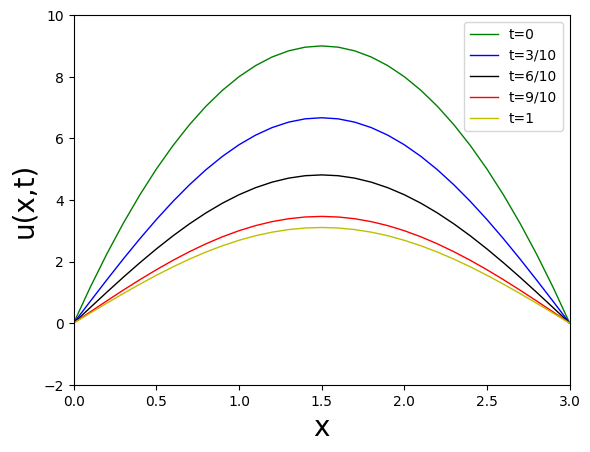

In [11]:
plt.plot(Space,U[:,0], 'g-', label='t=0',linewidth=1.0)
plt.plot(Space,U[:,3000], 'b-', label='t=3/10',linewidth=1.0)
plt.plot(Space,U[:,6000], 'k-', label='t=6/10',linewidth=1.0)
plt.plot(Space,U[:,9000], 'r-', label='t=9/10',linewidth=1.0)
plt.plot(Space,U[:,10000], 'y-', label='t=1',linewidth=1.0)
plt.ylabel('u(x,t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0,3)
plt.ylim(-2,10)
plt.legend(loc='upper right')
plt.show()

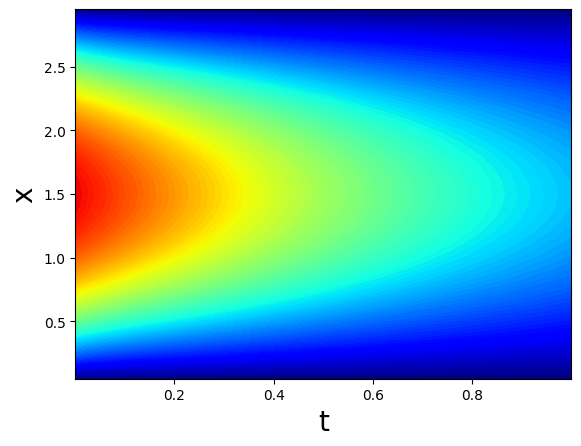

In [13]:
#温度等高线随时空坐标的变化，温度越高，颜色越偏红
extent = [0,1,0,3] #时间和空间的取值范围
levels = np.arange(0,10,0.1)#温度等高线的变化范围0-10，变化间隔为0.1
plt.contourf(U,levels,origin='lower',extent=extent,cmap=plt.cm.jet)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.show()

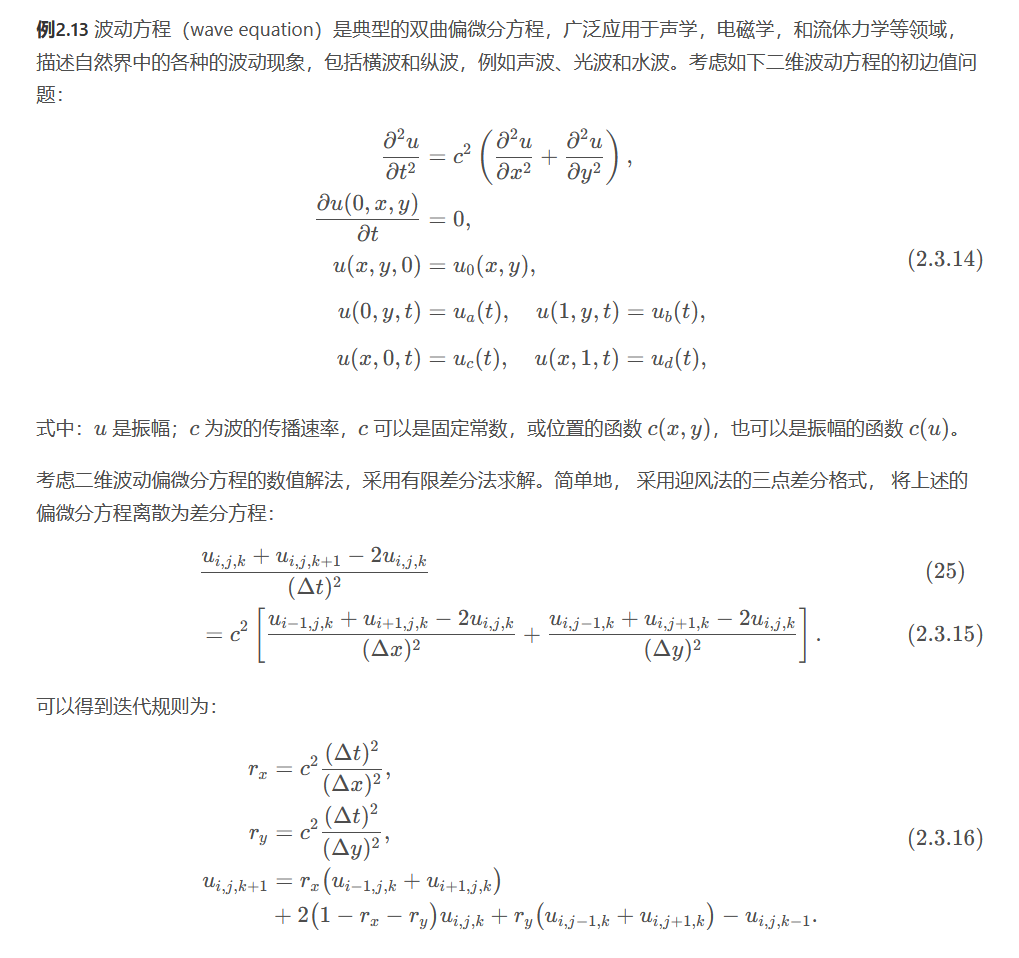

In [14]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-31 115723.png")

dt = 0.01, dx = 0.02, dy = 0.02, r = 0.50


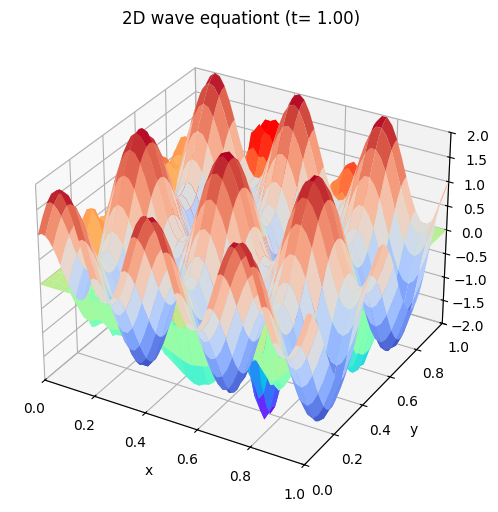

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# 模型参数
c = 1.0  # 波的传播速率
tc, te = 0.0, 1.0  # 时间范围，0<t<te
xa, xb = 0.0, 1.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 1.0  # 空间范围，ya<y<yb
# 初始化
c2 = c*c  # 方程参数
dt = 0.01  # 时间步长
dx = dy = 0.02  # 空间步长
tNodes = round(te/dt)  # t轴 时序网格数
xNodes = round((xb-xa)/dx)  # $\mathrm{x}$轴 空间网格数
yNodes = round((yb-ya)/dy)  # $\mathrm{y}$轴 空间网格数
tZone = np.arange(0, (tNodes+1)*dt, dt)  # 建立空间网格
xZone = np.arange(0, (xNodes+1)*dx, dx)  # 建立空间网格
yZone = np.arange(0, (yNodes+1)*dy, dy)  # 建立空间网格
xx, yy = np.meshgrid(xZone, yZone)  # 生成网格点的坐标 xx,yy (二维数组)
# 步长比检验(r>1 则算法不稳定)
r = 4 * c2 * dt*dt / (dx*dx+dy*dy)
print("dt = {:.2f}, dx = {:.2f}, dy = {:.2f}, r = {:.2f}".format(dt,dx,dy,r))
assert r < 1.0, "Error: r>1, unstable step ratio of dt2/(dx2+dy2) ."
rx = c*c * dt**2/dx**2
ry = c*c * dt**2/dy**2
# 绘图
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')
# 计算初始值
U = np.zeros([tNodes+1, xNodes+1, yNodes+1])  # 建立三维数组
U[0] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[0,:,:]
U[1] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[1,:,:]
surf = ax1.plot_surface(xx, yy, U[0,:,:], rstride=2, cstride=2, cmap=plt.cm.coolwarm)
# 有限差分法求解
for k in range(2,tNodes+1):
    for i in range(1,xNodes):
        for j in range(1,yNodes):
            U[k,i,j] = rx*(U[k-1,i-1,j]+U[k-1,i+1,j]) + ry*(U[k-1,i,j-1]+U[k-1,i,j+1])\
                     + 2*(1-rx-ry)*U[k-1,i,j] -U[k-2,i,j]
surf = ax1.plot_surface(xx, yy, U[k,:,:], rstride=2, cstride=2, cmap='rainbow')
ax1.set_xlim3d(0, 1.0)
ax1.set_ylim3d(0, 1.0)
ax1.set_zlim3d(-2, 2)
ax1.set_title("2D wave equationt (t= %.2f)" % (k*dt))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
plt.show()

t=0.00s	Tmax=25.1  Tmin=15.0
t=0.20s	Tmax=30.4  Tmin=15.0
t=0.40s	Tmax=34.0  Tmin=15.0
t=0.60s	Tmax=36.9  Tmin=15.0
t=0.80s	Tmax=39.3  Tmin=15.0
t=1.00s	Tmax=41.1  Tmin=15.0
t=1.20s	Tmax=42.4  Tmin=15.0
t=1.40s	Tmax=43.4  Tmin=15.0
t=1.60s	Tmax=44.1  Tmin=15.0
t=1.80s	Tmax=44.6  Tmin=15.0
t=2.00s	Tmax=45.0  Tmin=15.0
t=2.20s	Tmax=45.3  Tmin=15.0
t=2.40s	Tmax=45.5  Tmin=15.0
t=2.60s	Tmax=45.6  Tmin=15.0
t=2.80s	Tmax=45.8  Tmin=15.0
t=3.00s	Tmax=45.8  Tmin=15.0
t=3.20s	Tmax=45.9  Tmin=15.0
t=3.40s	Tmax=46.0  Tmin=15.0
t=3.60s	Tmax=46.0  Tmin=15.0
t=3.80s	Tmax=46.0  Tmin=15.0
t=4.00s	Tmax=46.0  Tmin=15.0
t=4.20s	Tmax=46.0  Tmin=15.0
t=4.40s	Tmax=46.1  Tmin=15.0
t=4.60s	Tmax=46.1  Tmin=15.0
t=4.80s	Tmax=46.1  Tmin=15.0
t=5.00s	Tmax=46.1  Tmin=15.0


C:\Users\dash2\AppData\Local\Temp\ipykernel_11316\303036216.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, zMat, 100, cmap=plt.cm.get_cmap('jet'), origin='lower', levels = levels)


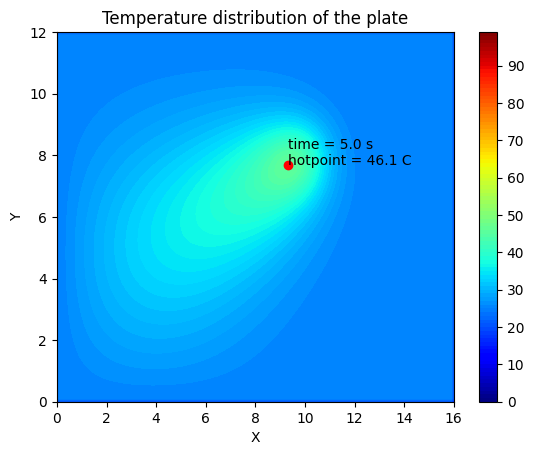

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def showcontourf(zMat, xyRange, tNow):  # 绘制等温云图
    x = np.linspace(xyRange[0], xyRange[1], zMat.shape[1])
    y = np.linspace(xyRange[2], xyRange[3], zMat.shape[0])
    xx,yy = np.meshgrid(x,y)
    zMax = np.max(zMat)
    yMax, xMax = np.where(zMat==zMax)[0][0], np.where(zMat==zMax)[1][0]
    levels = np.arange(0,100,1)
    showText = "time = {:.1f} s\nhotpoint = {:.1f} C".format(tNow, zMax)
    plt.plot(x[xMax],y[yMax],'ro')  # 绘制最高温度点
    plt.contourf(xx, yy, zMat, 100, cmap=plt.cm.get_cmap('jet'), origin='lower', levels = levels)
    plt.annotate(showText, xy=(x[xMax],y[yMax]), xytext=(x[xMax],y[yMax]),fontsize=10)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Temperature distribution of the plate')
    plt.show()
# 模型参数
uIni = 25  # 初始温度值
uBound = 25.0  # 边界条件
c = 1.0  # 热传导参数
qv = 50.0  # 热源功率
x_0, y0 = 0.0, 3.0  # 热源初始位置
vx, vy = 2.0, 1.0  # 热源移动速度
# 求解范围
tc, te = 0.0, 5.0  # 时间范围，0<t<te
xa, xb = 0.0, 16.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 12.0  # 空间范围，ya<y<yb
# 初始化
dt = 0.002  # 时间步长
dx = dy = 0.1  # 空间步长
tNodes = round(te/dt)  # t轴 时序网格数
xNodes = round((xb-xa)/dx)  # $\mathrm{x}$轴 空间网格数
yNodes = round((yb-ya)/dy)  # $\mathrm{y}$轴 空间网格数
xyRange = np.array([xa, xb, ya, yb])
xZone = np.linspace(xa, xb, xNodes+1)  # 建立空间网格
yZone = np.linspace(ya, yb, yNodes+1)  # 建立空间网格
xx,yy = np.meshgrid(xZone, yZone)  # 生成网格点的坐标 xx,yy (二维数组)
# 计算 差分系数矩阵 A、B (三对角对称矩阵)，差分系数 rx,ry,ft
A = (-2) * np.eye(xNodes+1, k=0) + (1) * np.eye(xNodes+1, k=-1) + (1) * np.eye(xNodes+1, k=1)
B = (-2) * np.eye(yNodes+1, k=0) + (1) * np.eye(yNodes+1, k=-1) + (1) * np.eye(yNodes+1, k=1)
rx, ry, ft = c*dt/(dx*dx), c*dt/(dy*dy), qv*dt
# 计算 初始值
U = uIni * np.ones((yNodes+1, xNodes+1))  # 初始温度 u0
# 前向Euler 法一阶差分求解
for k in range(tNodes+1):
    t = k * dt  # 当前时间
    # 热源条件
    # (1) 恒定热源：Qv(x_0,y0,t) = qv, 功率、位置 恒定
    # Qv = qv
    # (2) 热源功率随时间变化 Qv(x_0,y0,t)=f(t)
    # Qv = qv*np.sin(t*np.pi) if t<2.0 else qv
    # (3) 热源位置随时间变化 Qv(x,y,t)=f(x(t),y(t))
    xt, yt = x_0+vx*t, y0+vy*t  # 热源位置变化
    Qv = qv * np.exp(-((xx-xt)**2+(yy-yt)**2))  # 热源方程
    # 边界条件
    U[:,0] = U[:,-1] = uBound
    U[0,:] = U[-1,:] = uBound
    # 差分求解
    U = U + rx * np.dot(U,A) + ry * np.dot(B,U) + Qv*dt
    if k % 100 == 0:
        print('t={:.2f}s\tTmax={:.1f}  Tmin={:.1f}'.format(t, np.max(U), np.min(U)))
showcontourf(U, xyRange, k*dt)  # 绘制等温云图